In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# object.convex_hull

### 返回包含对象中所有点的最小凸包，除非对象中点的数量少于3。对于两个点，凸面体退化为LineString；对于1个点，为Point。

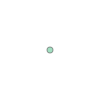

In [2]:
# 单点
Point(0,0).convex_hull

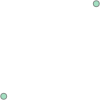

In [3]:
# 两个点
points1 = MultiPoint([(0,0) , (2,2)])
points1

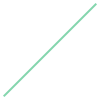

In [4]:
res1 = points1.convex_hull
res1

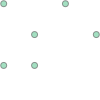

In [5]:
# 多点
points2 = MultiPoint([(0,0) , (0,2) , (2,2) , (3,1) , (1,0) , (1,1)])
points2

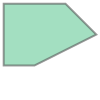

In [6]:
res2 = points2.convex_hull
res2

Text(0.5, 1.0, 'b) N > 2')

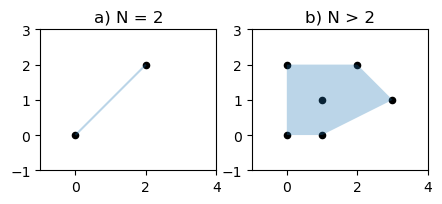

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(5,5))

gpd.GeoDataFrame([points1] , columns=["geometry"]).plot(ax=ax[0] , facecolor="k",markersize=20)
gpd.GeoDataFrame([res1] , columns=["geometry"]).plot(ax=ax[0] , alpha=0.3)
ax[0].set_xlim(-1,4)
ax[0].set_ylim(-1,3)
ax[0].set_title('a) N = 2')

gpd.GeoDataFrame([points2] , columns=["geometry"]).plot(ax=ax[1] , facecolor="k",markersize=20)
gpd.GeoDataFrame([res2] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
ax[1].set_xlim(-1,4)
ax[1].set_ylim(-1,3)
ax[1].set_title('b) N > 2')

# object.envelope

### 返回包含该对象的点或最小的外包矩形（边与坐标轴平行）。

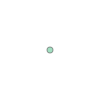

In [8]:
# 单点
Point(0,0).envelope

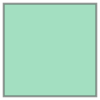

In [9]:
# 两个点
points1 = MultiPoint([(0, 0), (2, 2)])
res1 = points1.envelope
res1

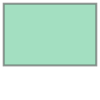

In [10]:
# 多点
points2 = MultiPoint([(0,0) , (0,2) , (2,2) , (3,1) , (1,0) , (1,1)])
res2 = points2.envelope
res2

Text(0.5, 1.0, 'b) N > 2')

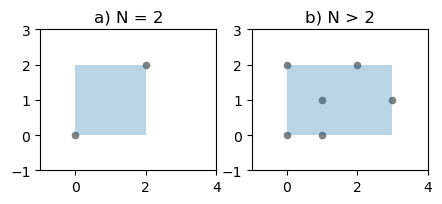

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(5,5))

gpd.GeoDataFrame([points1] , columns=["geometry"]).plot(ax=ax[0] , facecolor="gray",markersize=20)
gpd.GeoDataFrame([res1] , columns=["geometry"]).plot(ax=ax[0] ,  alpha=0.3)
ax[0].set_xlim(-1,4)
ax[0].set_ylim(-1,3)
ax[0].set_title('a) N = 2')


gpd.GeoDataFrame([points2] , columns=["geometry"]).plot(ax=ax[1] , facecolor="gray",markersize=20)
gpd.GeoDataFrame([res2] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
ax[1].set_xlim(-1,4)
ax[1].set_ylim(-1,3)
ax[1].set_title('b) N > 2')

# object.minimum_rotated_rectangle

### 返回包含该对象的最小外接矩形。与envelope不同的是，这个矩形不需与坐标轴平行。如果对象的凸包是一个退化物（线或点），则返回该退化物（线或点）。

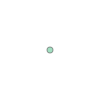

In [12]:
# 单点
Point(0,0).minimum_rotated_rectangle

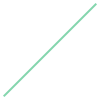

In [13]:
# 两个点
points1 = MultiPoint([(0, 0), (2, 2)])
res1 = points1.minimum_rotated_rectangle
res1

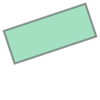

In [14]:
# 多点
points2 = MultiPoint([(0,0),(2,2),(3,1)])
res2 = points2.minimum_rotated_rectangle
res2

Text(0.5, 1.0, 'b) N > 2')

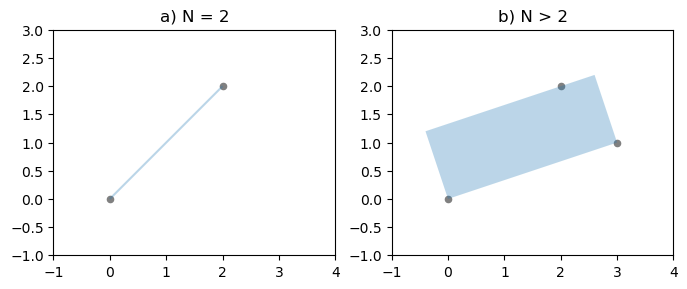

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

gpd.GeoDataFrame([points1] , columns=["geometry"]).plot(ax=ax[0] , facecolor="gray",markersize=20)
gpd.GeoDataFrame([res1] , columns=["geometry"]).plot(ax=ax[0] ,  alpha=0.3)
ax[0].set_xlim(-1,4)
ax[0].set_ylim(-1,3)
ax[0].set_title('a) N = 2')


gpd.GeoDataFrame([points2] , columns=["geometry"]).plot(ax=ax[1] , facecolor="gray",markersize=20)
gpd.GeoDataFrame([res2] , columns=["geometry"]).plot(ax=ax[1] , alpha=0.3)
ax[1].set_xlim(-1,4)
ax[1].set_ylim(-1,3)
ax[1].set_title('b) N > 2')

# object.offset_curve(distance, quad_segs=16, join_style=1, mitre_limit=5.0)

### 返回一个在其右边或左边与该对象有一定距离的LineString或MultiLineString几何对象。

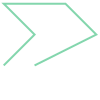

In [16]:
line = LineString([(0,0) , (1,1) , (0,2) , (2,2) , (3,1) , (1,0)])
line

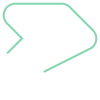

In [17]:
line.parallel_offset(distance=0.5 , side="left" , join_style="round")

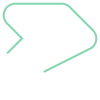

In [18]:
line.offset_curve(distance=0.5 , join_style="round")

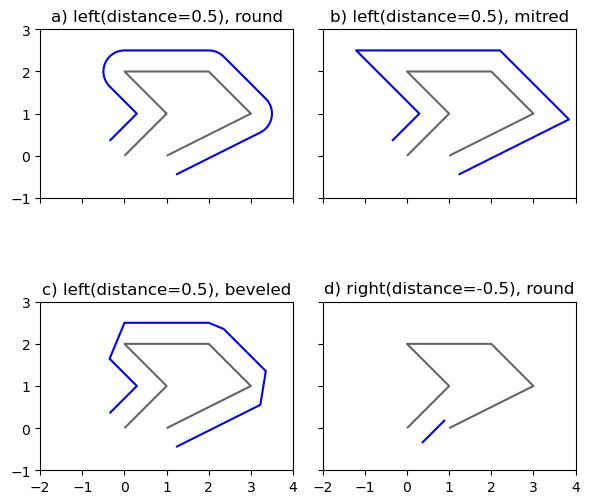

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=2,ncols=2,figsize=(6,6) , sharex="all" , sharey="all")

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=0.5 , join_style="round")] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="blue")
ax[0][0].set_xlim(-2,4)
ax[0][0].set_ylim(-1,3)
ax[0][0].set_title("a) left(distance=0.5), round") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=0.5 , join_style="mitre")] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="blue")
ax[0][1].set_title("b) left(distance=0.5), mitred") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=0.5 , join_style="bevel")] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="blue")
ax[1][0].set_title("c) left(distance=0.5), beveled") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=-0.5 , join_style="round")] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="blue")
ax[1][1].set_title("d) right(distance=-0.5), round") 

plt.tight_layout()

### mitre_limit参数的效果如下所示。

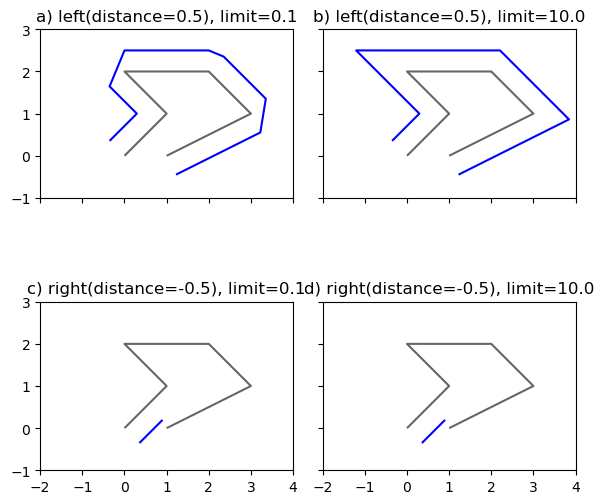

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=2,ncols=2,figsize=(6,6) , sharex="all" , sharey="all")

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=0.5 , join_style=2 , mitre_limit=0.1)] , columns=["geometry"]).plot(ax=ax[0,0] , edgecolor="blue")
ax[0][0].set_xlim(-2,4)
ax[0][0].set_ylim(-1,3)
ax[0][0].set_title("a) left(distance=0.5), limit=0.1") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=0.5 , join_style=2, mitre_limit=10.0)] , columns=["geometry"]).plot(ax=ax[0,1] , edgecolor="blue")
ax[0][1].set_title("b) left(distance=0.5), limit=10.0") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=-0.5 , join_style=2, mitre_limit=0.1)] , columns=["geometry"]).plot(ax=ax[1,0] , edgecolor="blue")
ax[1][0].set_title("c) right(distance=-0.5), limit=0.1") 

gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="k", alpha=0.6)
gpd.GeoDataFrame([line.offset_curve(distance=-0.5 , join_style=2, mitre_limit=10.0)] , columns=["geometry"]).plot(ax=ax[1,1] , edgecolor="blue")
ax[1][1].set_title("d) right(distance=-0.5), limit=10.0") 

plt.tight_layout()

# object.simplify(tolerance, preserve_topology=True)

### 返回几何对象的简化表示。

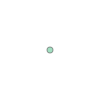

In [21]:
p = Point(0.0, 0.0)
p

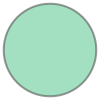

In [22]:
x = p.buffer(1.0)
x

In [23]:
x.area

3.1365484905459398

In [24]:
len(x.exterior.coords)

65

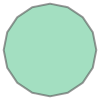

In [25]:
# 简化操作
s = x.simplify(0.05, preserve_topology=False)
s

In [26]:
s.area

3.061467458920719

In [27]:
len(s.exterior.coords)

17

Text(0.5, 1.0, 'b) tolerance = 0.5')

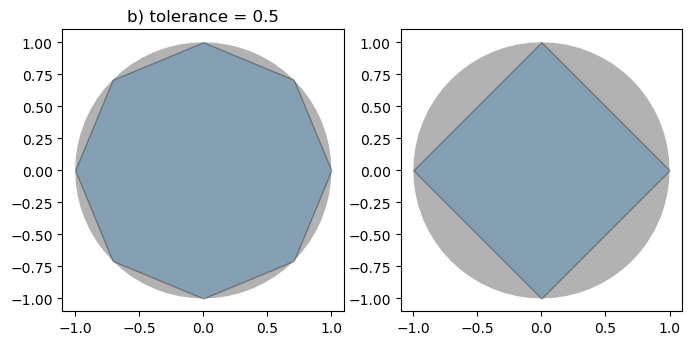

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

f , ax = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

gpd.GeoDataFrame([x] , columns=["geometry"]).plot(ax=ax[0] , facecolor="k" , alpha=0.3)
gpd.GeoDataFrame([x.simplify(tolerance=0.2)] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="k" , alpha=0.3)
ax[0].set_title('a) tolerance = 0.2')

gpd.GeoDataFrame([x] , columns=["geometry"]).plot(ax=ax[1] , facecolor="k" , alpha=0.3)
gpd.GeoDataFrame([x.simplify(tolerance=0.5)] , columns=["geometry"]).plot(ax=ax[1] , edgecolor="k" , alpha=0.3)
ax[0].set_title('b) tolerance = 0.5')

### 